In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import librosa.display
import numpy as np

In [2]:
from src.segment import Segment
sr = 22050

In [3]:
def parrallelAnalysis(a):
    audio_data, sr = librosa.load(a, sr=22050)
    librosa.display.waveshow(audio_data, x_axis='time')
    
    segment = Segment()
    segment.load(a, offset=0, length = 30, target_sr=sr)
    segment.addFeatures()
    features = segment.results.keys()
    for i, key in enumerate(segment.results.keys()):
        feature = segment.results[key]
        feature_shape = np.array(feature).shape
        feature_type = type(feature)
        if feature_type in [int] or feature_shape is ():
            print(i, key, feature_type, feature_shape, feature)
            continue
        if(feature_shape[0] == 1):
            feature = feature[0]
            feature_shape = np.array(feature).shape
            feature_type = type(feature)
            
        if(len(feature_shape) == 1):
            print(i, key, feature_type, feature_shape)
            fig, ax = plt.subplots()
            img = librosa.display.waveshow(feature, x_axis='time', ax=ax)
            ax.set(title=f'{key.title()}')
        else:
            print(i, key, feature_type, feature_shape)
            fig, ax = plt.subplots()
            img = librosa.display.specshow(feature, x_axis='time', y_axis='linear', ax=ax)
            ax.set(title=f'{key.title()}')
            fig.colorbar(img, ax=ax)
            # fig.colorbar(img, ax=ax, format="%+2.f dB")

TypeError: mel() got an unexpected keyword argument 'order'

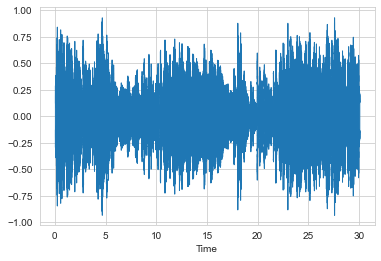

In [4]:
parrallelAnalysis('D:/Musik/Genres/Blues/blues.00038.wav')

In [ ]:
parrallelAnalysis('D:/Musik/Archive/cry_v2.mp3')